
# Notebook for CE802 Classification Task(P2)


In [2]:
#Importing all the required libraries 
import pandas as pd 
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# importing both train data and Test data
train_data = pd.read_csv("CE802_P2_Data.csv")
test_data  = pd.read_csv("CE802_P2_Test.csv")

# Data Analysis 

In the Data Prepocesising and analysis we are going to perform the following steps.<br>
            <br>1. Statistical analysis of Features and labels<br> 
            <br>2. Missing values identification<br>
            <br>3. Data Distribution<br>
            <br>4. Outlier detection<br>
            <br>5. Correlation calculation<br>

In [5]:
train_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,3.20,-4.91,-41.64,-21.63,8.41,2,5.42,-84.01,-9.40,76.72,-0.42,36,0.33,30.60,NaN,False
1,3.98,-5.25,-47.64,-23.43,8.66,2,4.32,-83.01,-11.16,2.72,0.50,111,0.84,39.42,9.26,True
2,12.60,0.41,-50.64,-15.51,16.34,20,-4.00,25.99,-15.08,450.72,-3.60,525,5.10,21.78,NaN,False
3,14.70,1.09,-50.64,-4.74,15.09,20,-8.16,10.99,-13.12,190.72,-5.71,660,7.25,15.78,6.57,False
4,2.74,-3.86,-35.64,-23.91,8.67,2,2.80,-53.01,-19.22,24.72,0.59,33,0.85,25.08,NaN,True


In [6]:
# Printing the train data info 
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   int64  
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   float64
 8   F9      1500 non-null   float64
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   int64  
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     750 non-null    float64
 15  Class   1500 non-null   bool   
dtypes: bool(1), float64(13), int64(2)
memory usage: 177.4 KB
None


We have all numerical varaibles for input features and the target label("Class") is a Binary variable(Boolean calss).

In [7]:
# Observing the statistical information about the data
train_data.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15
count,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,750.000000
mean,9.93752,-2.668787,-58.554000,-14.751160,11.477813,10.806667,-1.270267,-64.596000,-11.144707,139.610667,-1.892467,327.07400,3.854280,22.179780,7.683013
std,8.65042,2.540644,21.477945,7.541549,3.166909,9.009814,5.090345,40.188448,2.217929,142.833748,2.491236,352.00374,3.465276,7.662813,1.005117
min,0.00000,-11.700000,-110.640000,-37.740000,7.790000,0.000000,-10.400000,-179.010000,-19.620000,-19.280000,-6.400000,0.00000,0.000000,8.760000,4.960000
25%,2.48000,-4.550000,-80.640000,-20.580000,8.510000,2.000000,-6.180000,-83.010000,-12.300000,28.720000,-4.270000,45.00000,0.600000,14.692500,6.962500
50%,4.14000,-3.650000,-47.640000,-17.700000,8.870000,2.000000,0.710000,-70.010000,-10.840000,68.720000,-0.940000,150.00000,1.020000,25.170000,7.690000
75%,16.40000,-0.190000,-41.640000,-7.530000,14.240000,20.000000,2.500000,-49.010000,-9.840000,260.720000,-0.057500,585.00000,7.050000,27.870000,8.430000
max,31.40000,1.990000,-32.640000,-1.320000,17.940000,20.000000,15.460000,35.990000,-6.420000,470.720000,5.840000,1170.00000,10.350000,47.370000,10.040000


In [8]:
# Printing the sum of null values present in all features 
train_data.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15      750
Class      0
dtype: int64

Only the F15 feature has null values and needs some imputation to be done for missing colums 

In [9]:
# Observing mean value of F15 feature 
print(train_data['F15'].mean())

7.683013333333333


In [10]:
# Grouping data by Class label 
train_distributed = train_data.groupby(["Class"])

In [11]:
# Calculating the mean value of F15 feature wtr to label class
train_distributed['F15'].mean()

Class
False    7.008498
True     8.479099
Name: F15, dtype: float64

In [12]:
# the no of unique labels present in Class label 
train_data['Class'].unique()

array([False,  True])

In [13]:
# Value counts of class value 
train_data.Class.value_counts()

False    809
True     691
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

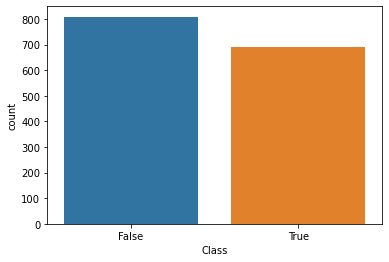

In [14]:
#bar plot for the value counts of class labels 
sns.countplot(x = train_data['Class'])

The Above data shows the number of examples for both class labels are properly balanced and no need to performae any kind of smapling on training data.

Text(0.5, 1.0, 'F15 distribution')

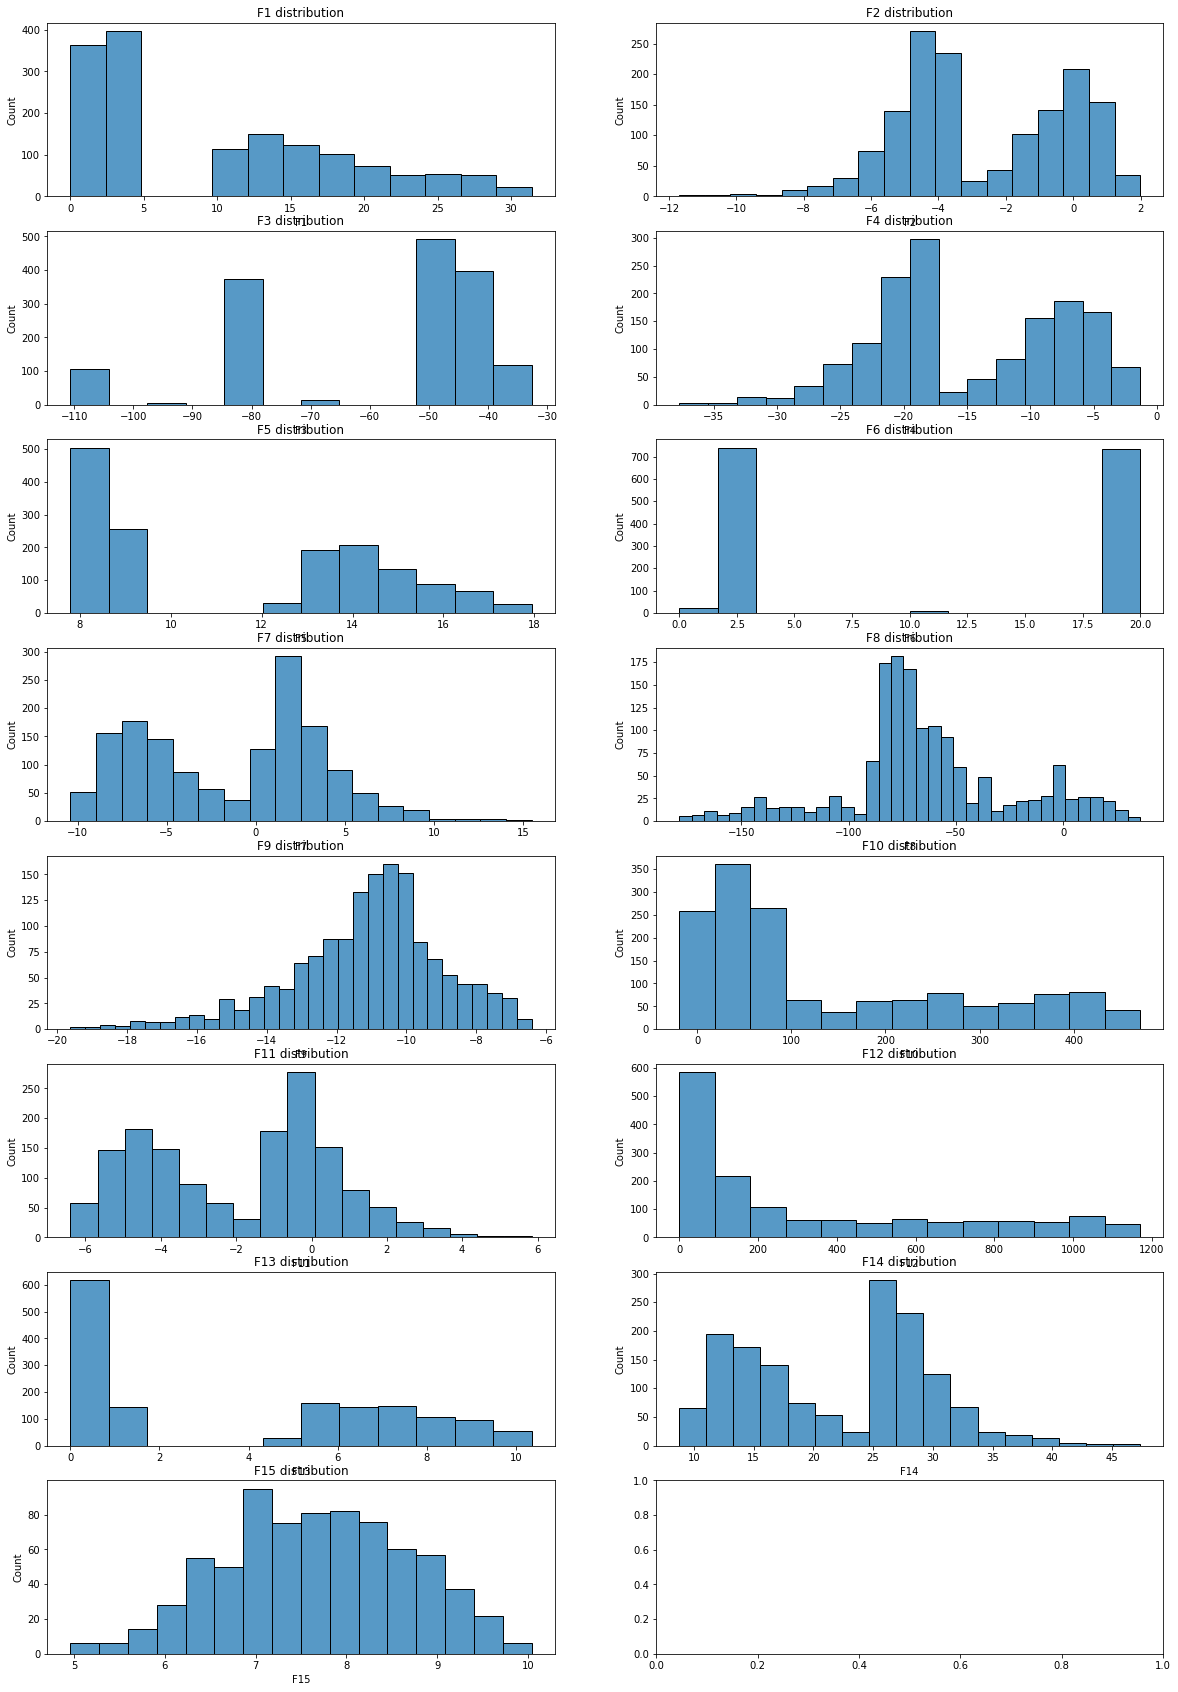

In [15]:
### PLotting the data distribution wrt to each feature ###
# Creating a 8*2 figure grid 
fig, axs  = plt.subplots(8,2,figsize = [20,30])
# F1 feature distribution
sns.histplot(train_data.F1,ax =axs[0,0])
axs[0,0].set_title('F1 distribution')
# F2 feature distribution
sns.histplot(train_data.F2,ax =axs[0,1])
axs[0,1].set_title('F2 distribution')
# F3 feature distribution
sns.histplot(train_data.F3,ax =axs[1,0])
axs[1,0].set_title('F3 distribution')
# F4 feature distribution
sns.histplot(train_data.F4,ax =axs[1,1])
axs[1,1].set_title('F4 distribution')
# F5 feature distribution
sns.histplot(train_data.F5,ax =axs[2,0])
axs[2,0].set_title('F5 distribution')
# F6 feature distribution
sns.histplot(train_data.F6,ax =axs[2,1])
axs[2,1].set_title('F6 distribution')
# F7 feature distribution
sns.histplot(train_data.F7,ax =axs[3,0])
axs[3,0].set_title('F7 distribution')
# F8 feature distribution
sns.histplot(train_data.F8,ax =axs[3,1])
axs[3,1].set_title('F8 distribution')
# F9 feature distribution
sns.histplot(train_data.F9,ax =axs[4,0])
axs[4,0].set_title('F9 distribution')
# F10 feature distribution
sns.histplot(train_data.F10,ax =axs[4,1])
axs[4,1].set_title('F10 distribution')
# F11 feature distribution
sns.histplot(train_data.F11,ax =axs[5,0])
axs[5,0].set_title('F11 distribution')
# F12 feature distribution
sns.histplot(train_data.F12,ax =axs[5,1])
axs[5,1].set_title('F12 distribution')
# F13 feature distribution
sns.histplot(train_data.F13,ax =axs[6,0])
axs[6,0].set_title('F13 distribution')
# F14 feature distribution
sns.histplot(train_data.F14,ax =axs[6,1])
axs[6,1].set_title('F14 distribution')
# F15 feature distribution
sns.histplot(train_data.F15,ax =axs[7,0])
axs[7,0].set_title('F15 distribution')

In [16]:
# Calculating the correlation between features 
corr_matrix = train_data.corr()
mask = np.zeros_like(corr_matrix, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

<AxesSubplot:>

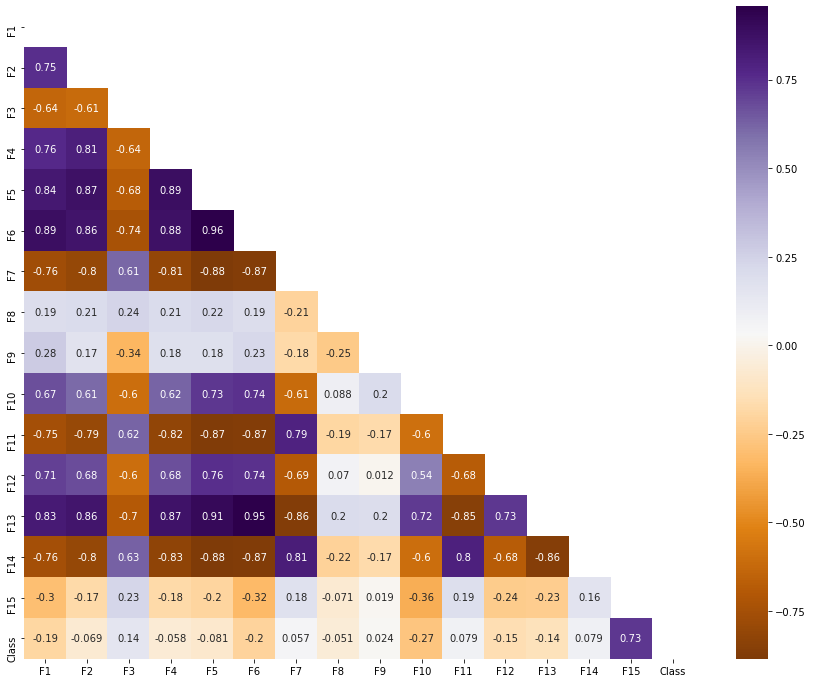

In [17]:
# Plotting the correlation matrix 
f,ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr_matrix, mask =mask,cmap='PuOr',annot = True)

From the Above correlation heat map F15 feature has higher correlation compared to others. After F15, F3 has the next best direct correlation to class labels

In [18]:
# Test data analysis 
test_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,19.10,0.05,-50.64,-9.21,17.09,20,-7.08,-34.01,-11.32,310.72,-5.48,900,5.45,10.38,NaN,NaN
1,14.60,1.32,-50.64,-2.64,17.04,20,4.74,-64.01,-9.72,170.72,-6.28,585,7.20,13.14,NaN,NaN
2,12.00,0.29,-80.64,-3.90,15.64,20,-7.62,-39.01,-7.52,60.72,-4.79,45,5.05,13.38,7.33,NaN
3,2.00,-5.10,-47.64,-25.92,8.10,2,4.42,-82.01,-17.14,14.72,-0.33,174,0.95,37.08,6.93,NaN
4,1.26,-3.43,-35.64,-18.60,8.87,2,1.88,-60.01,-14.36,14.72,-1.12,117,0.67,38.58,8.18,NaN


In [19]:
# Observing the statistical information about the data
test_data.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,750.000000,0.0
mean,10.202187,-2.537413,-58.572000,-14.599980,11.607053,11.025333,-1.386587,-62.280000,-11.365667,134.534667,-2.090853,327.896000,3.895293,21.982520,7.716347,NaN
std,8.611866,2.511221,21.219414,7.478681,3.238391,9.014814,5.129234,41.372078,2.403197,137.330172,2.528747,348.437105,3.438299,7.602147,1.014522,NaN
min,0.020000,-10.440000,-110.640000,-35.730000,7.820000,0.000000,-10.220000,-174.010000,-21.220000,-29.280000,-6.460000,0.000000,0.000000,8.640000,4.790000,NaN
25%,2.595000,-4.392500,-80.640000,-20.310000,8.510000,2.000000,-6.280000,-82.010000,-12.665000,28.720000,-4.490000,57.000000,0.620000,14.580000,6.982500,NaN
50%,10.200000,-3.490000,-50.640000,-17.685000,12.740000,20.000000,0.600000,-69.010000,-11.020000,66.720000,-1.060000,162.000000,5.050000,24.915000,7.715000,NaN
75%,16.900000,-0.080000,-41.640000,-7.485000,14.490000,20.000000,2.465000,-44.010000,-9.855000,240.720000,-0.150000,585.000000,7.000000,27.690000,8.460000,NaN
max,31.500000,1.890000,-32.640000,-0.300000,18.290000,20.000000,13.360000,35.990000,-6.600000,470.720000,6.020000,1200.000000,10.300000,47.520000,11.180000,NaN


In [20]:
# Printing the sum of null values present in all features
test_data.isnull().sum()

F1          0
F2          0
F3          0
F4          0
F5          0
F6          0
F7          0
F8          0
F9          0
F10         0
F11         0
F12         0
F13         0
F14         0
F15       750
Class    1500
dtype: int64

from above observation F15 feature has 750 null values anf Class label has all null values which need to be predicted

In [21]:
# observing mean value of F15 column in test data
test_data['F15'].mean()

7.716346666666667

In [22]:
# creating a copy of the original test data before any transformation
test_data_copy = test_data

In [23]:
# Dropping the class variable from the test data which has to be predicted 
test_data.drop('Class',inplace=True,axis=1)

In [24]:
# Seperating the class labels from the training data
label = train_data['Class']

In [25]:
# Dropping class labels from training data
train_data.drop('Class',inplace=True,axis=1)

# Data Preprocessing

In [26]:
#Importing libraries needed for missing values imputation, data normalization and train test split
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [27]:
# Splitting training data into train and test(75% for training and 25% testing)
X_train, X_test, y_train, y_test = train_test_split(train_data, label, test_size=0.25, random_state=1)

In [28]:
# Missing values imputation strategy 
imput = SimpleImputer(missing_values=np.nan, strategy='mean')

In [29]:
# Data scaling 
Scaler = RobustScaler()

# Decision Tree

In [30]:
# Importing libraries for cross validation, metrics, pipeline along with decision tree classifier
from sklearn import tree
from sklearn.model_selection import KFold,StratifiedKFold, ShuffleSplit, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
# 5 fold cross validation definition 
cv = StratifiedKFold(n_splits=5)

In [32]:
# Creating a Decision tree classifier estimator object
tree_clf = tree.DecisionTreeClassifier()

In [33]:
# pipeline including imputation , data scaling and Tree classifier
tree_pipe = Pipeline(steps=[('Imputer',imput), ('scaler', Scaler), ('classifier', tree_clf)])

In [34]:
# Hyper parameters to be tuned using the Gridsearch method
param_grid = {
    'classifier__criterion' : ['gini','entropy'],
    'classifier__max_depth': [7,8,9,10,11,12,15],
    'classifier__min_samples_split' : [5,7,8,10,15,20],
    
}

In [35]:
# decision tree Grid search cross validation method for best hyper parameter selection
tree_grid = GridSearchCV(tree_pipe, param_grid,cv = cv, verbose = 50, n_jobs=-1)

In [36]:
# Training the decision tree classifier
tree_grid.fit(X_train,y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('Imputer', SimpleImputer()),
                                       ('scaler', RobustScaler()),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [7, 8, 9, 10, 11, 12, 15],
                         'classifier__min_samples_split': [5, 7, 8, 10, 15,
                                                           20]},
             verbose=50)

In [37]:
print('\nBest Train Accuracy : %.2f'%tree_grid.best_score_, ' Best Params : ', str(tree_grid.best_params_))


Best Train Accuracy : 0.79  Best Params :  {'classifier__criterion': 'gini', 'classifier__max_depth': 7, 'classifier__min_samples_split': 5}


In [38]:
# Saving best Trainig score into a dictonary varaible
Training_score = {'Decision_tree': tree_grid.best_score_}

In [39]:
# Making predictions on Test data 
y_tree_pred = tree_grid.best_estimator_.predict(X_test)

In [40]:
# Calculating accuracy on the test Predictions
print(" Validation Accuracy:",metrics.accuracy_score(y_test, y_tree_pred))
Validation_score = {'Decision_tree':metrics.accuracy_score(y_test, y_tree_pred)}

 Validation Accuracy: 0.7946666666666666


In [85]:
# Calculating and printing matrix and Classification report 
tree_conf_mat = confusion_matrix(y_test, y_tree_pred)
print("Confusion Matrix")
print(tree_conf_mat)
print('\n')
print("Classification Report")
print(classification_report(y_test, y_tree_pred))

Confusion Matrix
[[168  42]
 [ 35 130]]


Classification Report
              precision    recall  f1-score   support

       False       0.83      0.80      0.81       210
        True       0.76      0.79      0.77       165

    accuracy                           0.79       375
   macro avg       0.79      0.79      0.79       375
weighted avg       0.80      0.79      0.80       375



From the above classification report out of 375(25% of train data) it was able to correctcly classify 291(78%)

# Support Vector Machine Classifier

In [42]:
# Importing support vector classification estimator 
from sklearn.svm import SVC

In [43]:
# Creating a object for SVC class
svm_clf = SVC()

In [44]:
# Creating a pipeline for SVC classifier and passing on SVC object 
svm_pipe = Pipeline(steps=[('Imputer',imput), ('scaler', Scaler), ('classifier', svm_clf)])

In [45]:
# Hyper parameters to be tuned using the Gridsearch method
param_grid = {
    'classifier__kernel':['rbf','sigmoid','linear'],
    'classifier__C' : [0.1,1,5,10,25,50,65,75],
    'classifier__gamma': np.logspace(-10,10,20),
    
}

In [46]:
# SVM cross validation Grid search method for best hyper parameter selection
svm_grid = GridSearchCV(svm_pipe, param_grid,cv = cv, verbose = 50, n_jobs=-1)

In [47]:
# Training the svm classifier with train data 
svm_grid = svm_grid.fit(X_train,y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0880s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  18 t

[Parallel(n_jobs=-1)]: Done 254 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 260 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 262 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 282 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:    5.8s
[Paralle

[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 524 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 526 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 530 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 532 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 534 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 542 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 544 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 548 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 550 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 552 tasks      | elapsed:   12.3s
[Paralle

[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 794 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 798 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 800 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 802 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 804 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 806 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 810 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 814 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 816 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 818 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 820 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 822 tasks      | elapsed:   21.0s
[Paralle

[Parallel(n_jobs=-1)]: Done 1058 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 1060 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 1062 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done 1064 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 1066 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 1068 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 1070 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 1072 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 1074 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 1076 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-1)]: Done 1078 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 1080 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 1082 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 1084 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 1086 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-1)]: Done 1088 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1283 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 1284 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done 1285 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 1286 tasks      | elapsed:   46.8s
[Parallel(n_jobs=-1)]: Done 1287 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done 1288 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done 1289 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 1290 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 1291 tasks      | elapsed:   47.0s
[Parallel(n_jobs=-1)]: Done 1292 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 1293 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 1294 tasks      | elapsed:   47.1s
[Parallel(n_jobs=-1)]: Done 1295 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 1296 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 1297 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 1298 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1415 tasks      | elapsed:   59.3s
[Parallel(n_jobs=-1)]: Done 1416 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done 1417 tasks      | elapsed:   59.4s
[Parallel(n_jobs=-1)]: Done 1418 tasks      | elapsed:   59.5s
[Parallel(n_jobs=-1)]: Done 1419 tasks      | elapsed:   59.5s
[Parallel(n_jobs=-1)]: Done 1420 tasks      | elapsed:   59.8s
[Parallel(n_jobs=-1)]: Done 1421 tasks      | elapsed:   59.8s
[Parallel(n_jobs=-1)]: Done 1422 tasks      | elapsed:   59.9s
[Parallel(n_jobs=-1)]: Done 1423 tasks      | elapsed:   60.0s
[Parallel(n_jobs=-1)]: Done 1424 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1425 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1426 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1427 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1428 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1429 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1430 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1546 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1547 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1548 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1549 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1550 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1551 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1553 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1554 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1555 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1556 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1557 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1558 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1559 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1561 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1678 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1679 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1680 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1681 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1682 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1683 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1684 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1685 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1686 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1687 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1688 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1689 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1690 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1691 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1692 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1693 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1809 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1810 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1811 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1812 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1813 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1814 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1815 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1816 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1817 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1818 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1819 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1820 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1821 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1822 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1823 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1824 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 1940 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1941 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1942 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1943 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1944 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1945 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1946 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1947 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1948 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1949 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1950 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1951 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1952 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1953 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1954 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1955 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2073 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2074 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2075 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2076 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2077 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2078 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2079 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2080 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2081 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2082 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2083 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2084 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2085 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2086 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2087 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2088 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2205 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 2206 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 2207 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 2208 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 2209 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 2210 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 2211 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 2212 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 2213 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 2214 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 2215 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 2216 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 2217 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 2218 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 2219 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 2220 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2336 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 2337 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 2338 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 2339 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 2340 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 2341 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 2342 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 2343 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 2344 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 2345 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 2346 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 2347 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 2348 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 2349 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 2350 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 2351 tasks      | elapsed: 

In [48]:
print('\nBest Train Accuracy : %.2f'%svm_grid.best_score_, ' Best Params : ', str(svm_grid.best_params_))


Best Train Accuracy : 0.87  Best Params :  {'classifier__C': 65, 'classifier__gamma': 1e-10, 'classifier__kernel': 'linear'}


In [49]:
# Saving best Trainig score into a dictonary varaible
Training_score['SVM_classifier'] = svm_grid.best_score_

In [50]:
# Making predictions on Test data
y_svm_pred = svm_grid.best_estimator_.predict(X_test)

In [51]:
# Calculating the accuracy of the predictions made on test data and saving it into a dictionary 
print("Vlaidation Accuracy:",metrics.accuracy_score(y_test, y_svm_pred))
Validation_score['SVM_classifier'] = metrics.accuracy_score(y_test, y_svm_pred)

Vlaidation Accuracy: 0.8586666666666667


In [87]:
# Calculating and printing confusion matrix along with Classification report 
print('Confusion Matrix')
svm_conf_mat = confusion_matrix(y_test, y_svm_pred)
print(svm_conf_mat)
print('\n')
print('Classification Report')
print(classification_report(y_test, y_svm_pred))

Confusion Matrix
[[176  34]
 [ 19 146]]


Classification Report
              precision    recall  f1-score   support

       False       0.90      0.84      0.87       210
        True       0.81      0.88      0.85       165

    accuracy                           0.86       375
   macro avg       0.86      0.86      0.86       375
weighted avg       0.86      0.86      0.86       375



# Logistic Regression

In [53]:
# importing logistic regressor from linear models
from sklearn.linear_model import LogisticRegression

In [54]:
# Creating an object for logistic regressor
Lg_clf = LogisticRegression()

In [55]:
# Creating an pipeline for logisctic Regressor
Lg_pipe = Pipeline(steps=[('Imputer',imput), ('scaler', Scaler), ('classifier', Lg_clf)])

In [56]:
# Hyper parameters to be tuned using the Gridsearch method
param_grid = {
    'classifier__penalty':['l1','l2','elasticnet','none'],
    'classifier__C': np.logspace(-10,10,40),
    'classifier__solver' : ['saga','sag','liblinear','newton-cg','lbfgs'],
    
}

In [57]:
# Logistic regression cross validation Grid search method for best hyper parameter selection
Lg_grid = GridSearchCV(Lg_pipe, param_grid,cv = cv, verbose = 50, n_jobs=-1)

In [58]:
# Trainign the logistic regression model
Lg_clf = Lg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0422s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  18 t

[Parallel(n_jobs=-1)]: Done 832 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 848 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 856 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 864 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 872 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 880 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 888 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 896 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 904 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 912 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 920 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 936 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 952 tasks      | elapsed:   10.8s
[Paralle

[Parallel(n_jobs=-1)]: Done 1880 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 1888 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 1896 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 1904 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 1912 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 1920 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 1928 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 1936 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done 1944 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 1952 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 1960 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 1968 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 1976 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 1984 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 1992 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 2000 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 2936 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 2944 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 2952 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 2960 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 2968 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 2976 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 2984 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 2992 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 3000 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 3008 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 3016 tasks      | elapsed:   34.2s
[Parallel(n_jobs=-1)]: Done 3024 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 3032 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 3048 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 3056 tasks      | elapsed: 

[Parallel(n_jobs=-1)]: Done 3982 tasks      | elapsed:   46.2s
[Parallel(n_jobs=-1)]: Done 3983 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 3984 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 3985 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 3986 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 3987 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 3988 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 3989 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 3990 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 3991 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 3992 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 3993 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:   46.5s finished


In [79]:
print('\nBest Train Accuracy : %.2f'%Lg_grid.best_score_, ' Best Params : ', str(Lg_grid.best_params_))


Best Train Accuracy : 0.88  Best Params :  {'classifier__C': 5.8780160722748995, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


In [102]:
print('Coefficients of the Logistic regression model fitted')
print(Lg_grid.best_estimator_['classifier'].coef_)

Coefficients of the Logistic regression model fitted
  (0, 0)	4.161589098672272
  (0, 1)	0.2836532764444327
  (0, 2)	-2.5748475089130753
  (0, 3)	0.3724437052071376
  (0, 4)	24.03162984012729
  (0, 5)	-42.81661469345258
  (0, 6)	0.29584980332255195
  (0, 7)	-0.7263772280886329
  (0, 8)	0.25032404200513836
  (0, 9)	-4.391389994149869
  (0, 10)	0.2874007834741663
  (0, 11)	-3.512632093559934
  (0, 12)	15.357467442355786
  (0, 13)	-0.0766538602650057
  (0, 14)	2.4916741382323364


In [60]:
# Saving best Trainig score into a dictonary varaible
Training_score['Logistic_Regressor'] = Lg_grid.best_score_

In [61]:
# Making predictions on test data using the best lg model trained
y_Lg_pred = Lg_grid.best_estimator_.predict(X_test)

In [80]:
# Calculating the accuracy of the predictions made on test data and saving it into a dictionary
print("Validation Accuracy:",metrics.accuracy_score(y_test, y_Lg_pred))
Validation_score['Logistic_Regressor'] = metrics.accuracy_score(y_test, y_Lg_pred)

Validation Accuracy: 0.856


In [103]:
# Calculating and printing confusion matrix along with Classification report
print('Confusion Matrix')
Lg_conf_mat = confusion_matrix(y_test, y_Lg_pred)
print(Lg_conf_mat)
print('\n')
print('Classification Report')
print(classification_report(y_test, y_Lg_pred))

Confusion Matrix
[[176  34]
 [ 20 145]]


Classification Report
              precision    recall  f1-score   support

       False       0.90      0.84      0.87       210
        True       0.81      0.88      0.84       165

    accuracy                           0.86       375
   macro avg       0.85      0.86      0.86       375
weighted avg       0.86      0.86      0.86       375



# Ensembler(Stacked Classifier)

In [64]:
# Importing the ensembler classiifiers and other classifiers for stacking
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

Using "GradientBoostingClassifier" for level 2 classification and for level classifier we are using the best of the SVM , DT and Logistic Regression also included Naive bais and Knn classifiers 

In [65]:
# Mentioning all the estimators to be used in level 1 
estimators = [('DT', tree_grid.best_estimator_),
              ('SVM_lin', svm_grid.best_estimator_),
              ('NB',GaussianNB()),
              ('LR',Lg_grid.best_estimator_),
              ('KNN',KNeighborsClassifier(n_neighbors=10, algorithm='ball_tree',weights = 'distance'))]

In [66]:
# Level 2 classifier hyper parameter configuration
final_estimator = GradientBoostingClassifier(n_estimators=75, subsample=0.2, min_samples_leaf=10, max_features=1,random_state=1)

In [67]:
# Stacked classifier configuration
ensembler = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [68]:
# Pipe line creation for stacked Classifier
ensm_pipe = Pipeline(steps=[('Imputer',imput), ('scaler', Scaler), ('classifier', ensembler)])

In [69]:
# Training the ensembler 
ensm_pipe = ensm_pipe.fit(X_train,y_train)

In [70]:
# Training accuracy for the train data
# Saving best Trainig score into a dictonary varaible
Training_score['Stacked_classifier'] = ensm_pipe.score(X_train,y_train)
print(Training_score['Stacked_classifier'])


0.9235555555555556


In [71]:
# Making predictions on the test data with ensembler classifier
y_ensm_pred = ensm_pipe.predict(X_test)

In [72]:
# Calculating the accuracy of the predictions made on test data and saving it into a dictionary
print("Accuracy:",metrics.accuracy_score(y_test, y_ensm_pred))
Validation_score['Stacked_classifier'] = metrics.accuracy_score(y_test, y_ensm_pred)

Accuracy: 0.8506666666666667


In [104]:
# Calculating and printing confusion matrix along with Classification report
ensm_conf_mat = confusion_matrix(y_test, y_Lg_pred)
print('Confusion Matrix')
print(ensm_conf_mat)
print('\n')
print('Classification Report')
print(classification_report(y_test, y_Lg_pred))

Confusion Matrix
[[176  34]
 [ 20 145]]


Classification Report
              precision    recall  f1-score   support

       False       0.90      0.84      0.87       210
        True       0.81      0.88      0.84       165

    accuracy                           0.86       375
   macro avg       0.85      0.86      0.86       375
weighted avg       0.86      0.86      0.86       375



# Metrics Comparision

In [74]:
# Importing confusion matrix display
from sklearn.metrics import ConfusionMatrixDisplay

Text(0.5, 0, '')

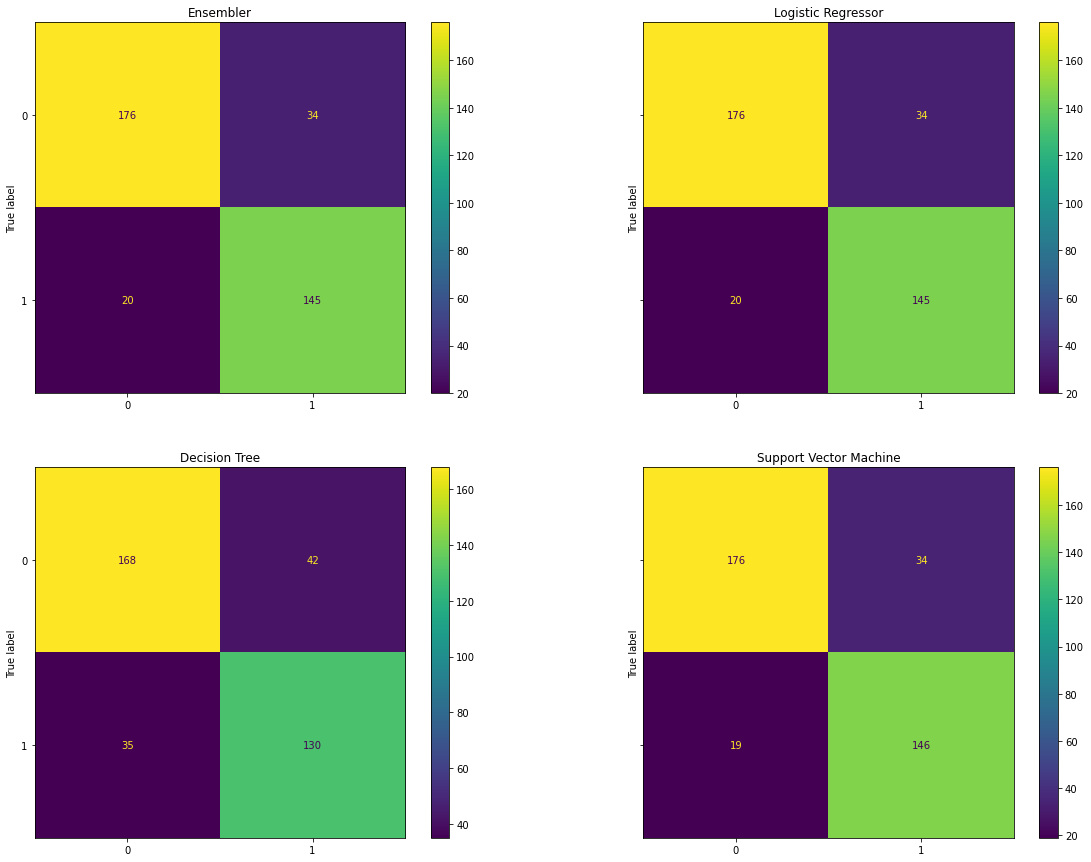

In [75]:
# Creating 4 subplots for plotting confusion matrix of each estimator trained above
f, axes = plt.subplots(2,2,figsize=(20,15), sharey='row')
# Ensembler Confusion matrix
en_d_cm = ConfusionMatrixDisplay(ensm_conf_mat)
en_d_cm.plot(ax= axes[0,0])
en_d_cm.ax_.set_title('Ensembler')
en_d_cm.ax_.set_xlabel('')
# Logistic Regressor Confusion matrix
Lg_d_cm = ConfusionMatrixDisplay(Lg_conf_mat)
Lg_d_cm.plot(ax= axes[0,1])
Lg_d_cm.ax_.set_title('Logistic Regressor')
Lg_d_cm.ax_.set_xlabel('')
# SVM Confusion matrix
svm_d_cm = ConfusionMatrixDisplay(tree_conf_mat)
svm_d_cm.plot(ax= axes[1,0])
svm_d_cm.ax_.set_title('Decision Tree')
svm_d_cm.ax_.set_xlabel('')
# Decision Tree Confusion matrix
tree_d_cm = ConfusionMatrixDisplay(svm_conf_mat)
tree_d_cm.plot(ax= axes[1,1])
tree_d_cm.ax_.set_title('Support Vector Machine')
tree_d_cm.ax_.set_xlabel('')

From Above Confusion matrix Support vector machine classifier works better than other classification tasks.

Text(0, 0.5, 'accuracy score')

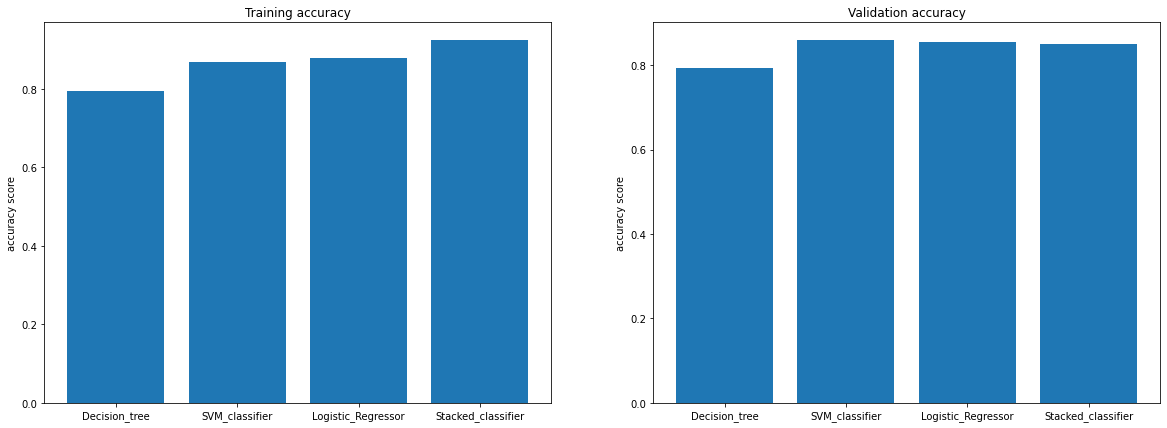

In [105]:
# PLotting best train and test accuracies of all the models trained 
plt.subplots(1,2,figsize= (20,7))
# Plotting best train accuracry achieved by each classification algorithm
plt.subplot(1,2,1)
plt.bar(Training_score.keys(),Training_score.values())
plt.subplot(1,2,1).set_title('Training accuracy')
plt.subplot(1,2,1).set_ylabel('accuracy score')
# Plotting best test accuracry achieved by each classification algorithm
plt.subplot(1,2,2)
plt.bar(Validation_score.keys(),Validation_score.values())
plt.subplot(1,2,2).set_title('Validation accuracy')
plt.subplot(1,2,2).set_ylabel('accuracy score')

Even though Stacked Classifier achieved highest training accuracy. But during the validation phase SVM classifier outperformed all others with better accuracy

# Predictions on Test Data 

In [77]:
# Making Predictions for the test data
Test_class_labels = svm_grid.best_estimator_.predict(test_data)

In [78]:
# Convering it to Pandas data frame for visulation
DF_labels['Class'] = pd.DataFrame(Test_class_labels)

NameError: name 'DF_labels' is not defined

In [ ]:
#bar plot for the value counts of class labels 
sns.countplot(x = DF_labels['Class'])
print(DF_labels['Class'].value_counts())

In [ ]:
# Adding the predictions to the copy of the test data 
test_data_copy['Class'] = Test_class_labels

In [ ]:
test_data_copy.head()

In [ ]:
# Saving the new test data with predictions to csv file
test_data_copy.to_csv('output\CE802_P2_Test2.csv', index = False)